In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset=pd.read_csv("/content/Electrical energy Dataset/Train.csv")
test_dataset=pd.read_csv("/content/Electrical energy Dataset/Test.csv")

In [4]:
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9188 entries, 0 to 9187
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9188 non-null   float64
 1   input_voltage  9188 non-null   float64
 2   el_power       9188 non-null   float64
dtypes: float64(3)
memory usage: 215.5 KB


,time,input_voltage,el_power
0,810.00,3.0,1102.949693
1,811.04,3.0,1199.403786
2,812.08,3.0,1113.199817
3,813.18,3.0,1200.377939
4,814.18,3.0,1105.465349


In [16]:
X_train = train_dataset.drop(columns=['el_power', 'input_voltage'])
y_train = train_dataset['el_power']


In [20]:
X_test = train_dataset.drop(columns=['el_power', 'input_voltage'])
y_test = train_dataset['el_power']

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 426998.1283958748
R-squared: 0.11089819645161547


In [25]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1445.937980272313
Coefficients: [0.0778614]


Graphical representation of the model performance

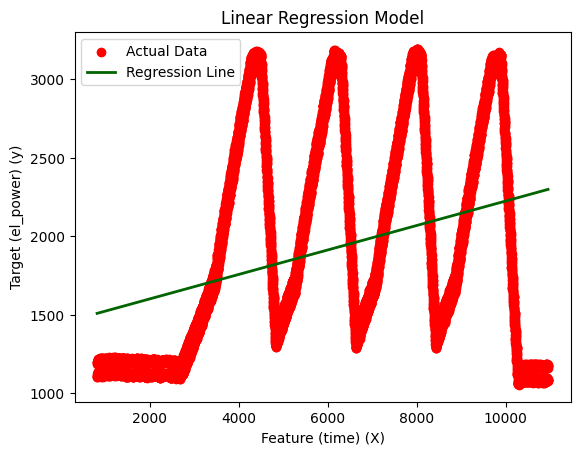

In [31]:
plt.scatter(X_test, y_test, color='red', label="Actual Data")

plt.plot(X_test, y_pred, color='darkgreen', linewidth=2, label="Regression Line")

plt.xlabel("Feature (time) (X)")
plt.ylabel("Target (el_power) (y)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

This graph shows the line of best fit (green line) and the feature X plotted (red line), looking at this graph it can be seen that our model is not performing well. because this line does not close around plotted graph hence indicating the poor performance of our model.

In [61]:
def gradient_descent(x, y, learning_rate=0.02, iterations=100):
    m_current = 0
    b_current = 0
    n = len(x)

    x = np.array(x)
    y = np.array(y)

    for i in range(iterations):
        y_predicted = m_current * x + b_current

        md = -(2/n) * np.sum(x * (y - y_predicted))
        bd = -(2/n) * np.sum(y - y_predicted)

        m_current = m_current - learning_rate * md
        b_current = b_current - learning_rate * bd

        print(f"Iteration {i}: m = {m_current:.4f}, b = {b_current:.4f}")

    return m_current, b_current


Since we have already performed linear regression on our certain model, we will convert our dataset to arrays then apply our gradient descent function to them

In [62]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

In [63]:
m, b = gradient_descent(X_train_array, y_train_array, learning_rate=0.02, iterations=50)

Iteration 0: m = 4063652881.5902, b = 698005.6883
Iteration 1: m = -63739473294184022016.0000, b = -8694712683585216.0000
Iteration 2: m = 999770540168281682015388958720.0000, b = 136378873819294431897976832.0000
Iteration 3: m = -15681666027817369465286984730531149643776.0000, b = -2139138798912849169398670761178169344.0000
Iteration 4: m = 245971089892894782873896816345984552837668241670144.0000, b = 33552959288089521803381938411526259413463597056.0000
Iteration 5: m = -3858121768170287659714330985037559951607730892675713192689664.0000, b = -526287063541807202768795322104482686537369826308395106304.0000
Iteration 6: m = 60515662976941588627237572906347030866736311901281275196662843057373184.0000, b = 8254952145153379158885398718235553658079443083263028816980654161920.0000
Iteration 7: m = -949204220497047891070575236634233827199041859560103009213340573420718141986570240.0000, b = -129481113330384828014581520392157463613712869667153087943393641822208206569472.0000
Iteration 8: m = 148

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration 29: m = -inf, b = -25883765444424843721969833512675662872981369653872870252280028994076898907065190238289364050682823894855286897539244865005258633410213835757325835392480743416527011817925101002814195727078564889333245998728527060135451155058078262727589316467285066891146685622253211163693743213779727412355384748277760.0000


<ipython-input-61-63b106213087>:15: RuntimeWarning: invalid value encountered in scalar subtract
  m_current = m_current - learning_rate * md


Iteration 30: m = nan, b = inf
Iteration 31: m = nan, b = nan
Iteration 32: m = nan, b = nan
Iteration 33: m = nan, b = nan
Iteration 34: m = nan, b = nan
Iteration 35: m = nan, b = nan
Iteration 36: m = nan, b = nan
Iteration 37: m = nan, b = nan
Iteration 38: m = nan, b = nan
Iteration 39: m = nan, b = nan
Iteration 40: m = nan, b = nan
Iteration 41: m = nan, b = nan
Iteration 42: m = nan, b = nan
Iteration 43: m = nan, b = nan
Iteration 44: m = nan, b = nan
Iteration 45: m = nan, b = nan
Iteration 46: m = nan, b = nan
Iteration 47: m = nan, b = nan
Iteration 48: m = nan, b = nan
Iteration 49: m = nan, b = nan


In [58]:
def predict(X, m, b):
    return m * X + b

y_pred_gd = predict(X_test, m, b)
print("Predictions for X_test =", X_test, "are:",y_pred_gd)

Predictions for X_test =           time
0       810.00
1       811.04
2       812.08
3       813.18
4       814.18
...        ...
9183  10950.28
9184  10951.34
9185  10952.42
9186  10953.48
9187  10954.52

[9188 rows x 1 columns] are:       time
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
...    ...
9183   NaN
9184   NaN
9185   NaN
9186   NaN
9187   NaN

[9188 rows x 1 columns]
